<a href="https://colab.research.google.com/github/Josh-robins/SPARK_AI_Medical_Imgaing_Class/blob/main/week4/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [51]:
# import diabtes.csv in my drives folder

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/diabetes.csv'

diabtes_df = pd.read_csv(file_path)

print(diabtes_df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [52]:
diabtes_df.shape


(768, 9)

In [6]:
diabtes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabtes_df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
# feature type
diabtes_df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [9]:
diabtes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# Fill missing values with the mean for numerical features
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    diabtes_df[col] = diabtes_df[col].replace(0, diabtes_df[col].mean())
print(diabtes_df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [11]:
# Class imbalance check and handling

diabtes_df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


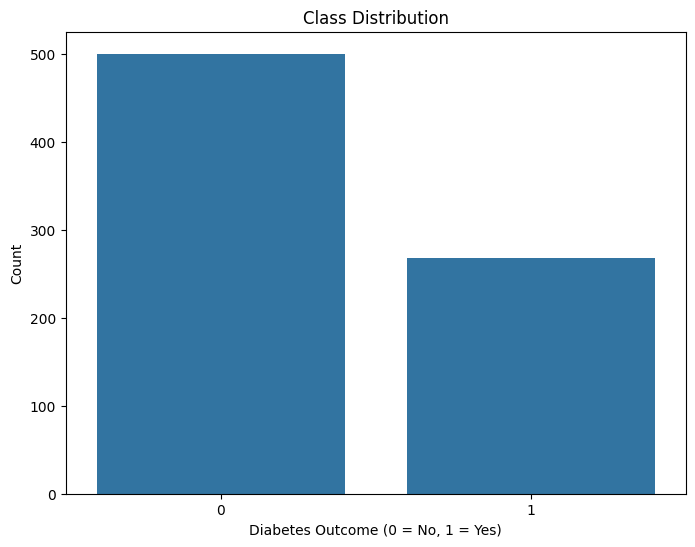

In [12]:
#from __future__ import annotations
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=diabtes_df)
#plt.xticks([0, 1], ['Non Diabetic', 'Diabetic'])
plt.title('Class Distribution')
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

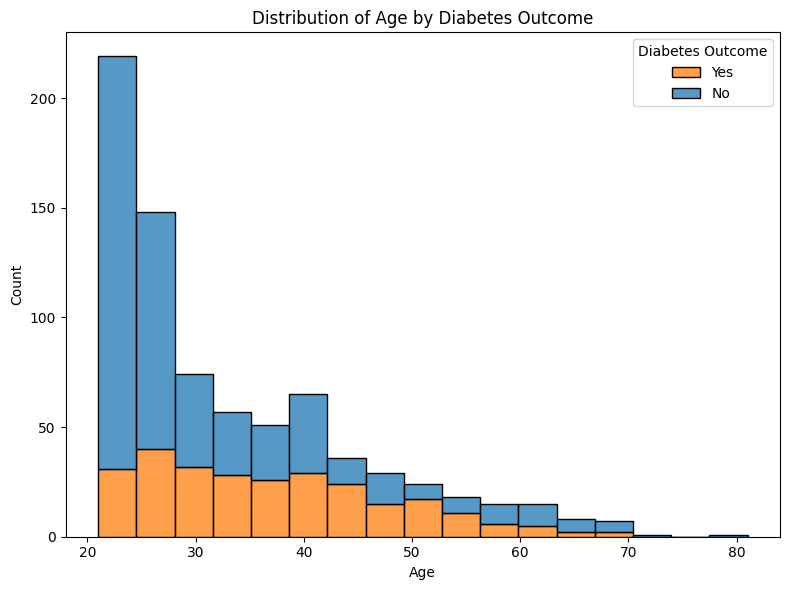

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(data = diabtes_df,x= "Age", hue='Outcome', kde=False, multiple="stack")
plt.title(f'Distribution of Age by Diabetes Outcome')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.legend(title='Diabetes Outcome',labels =['Yes','No'])
plt.show()

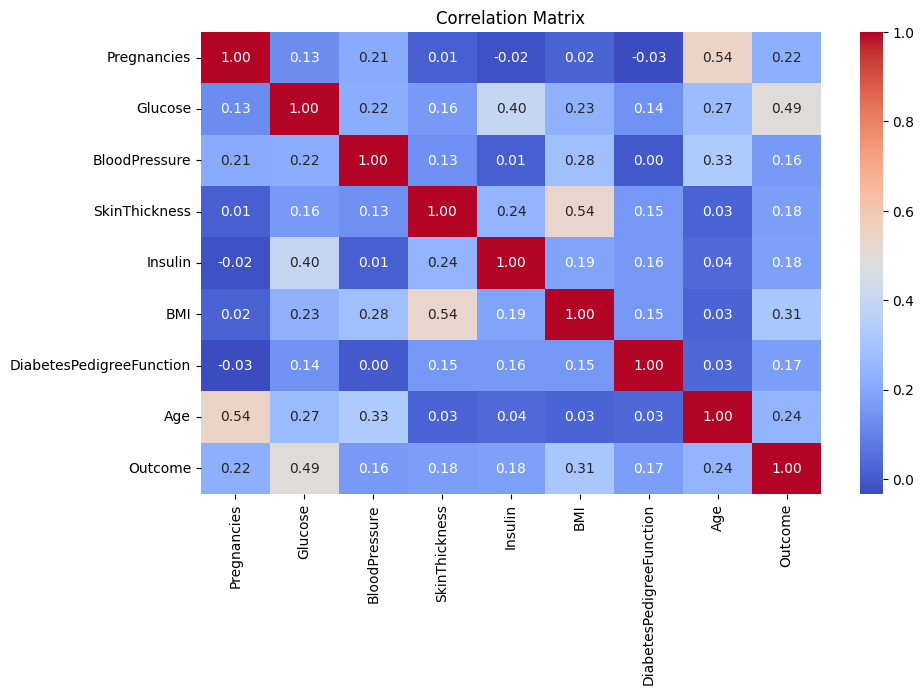

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(diabtes_df.corr(), annot=True, cmap= 'coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Data Processing

In [43]:
#Split into featires and targets
# Drop least important features
X = diabtes_df.drop(columns=['Outcome', 'BloodPressure', 'SkinThickness'])

y=diabtes_df['Outcome']

In [44]:
#Split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Build the model

In [45]:
# Train Random Forest with tuned hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=400,       # More trees
    max_depth=10,           # Limits depth for better generalization
    min_samples_split=4,    # Prevents overfitting
    min_samples_leaf=2,     # More stable splits
    max_features='sqrt',    # Uses sqrt(features) for best splits
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=400, random_state=42)

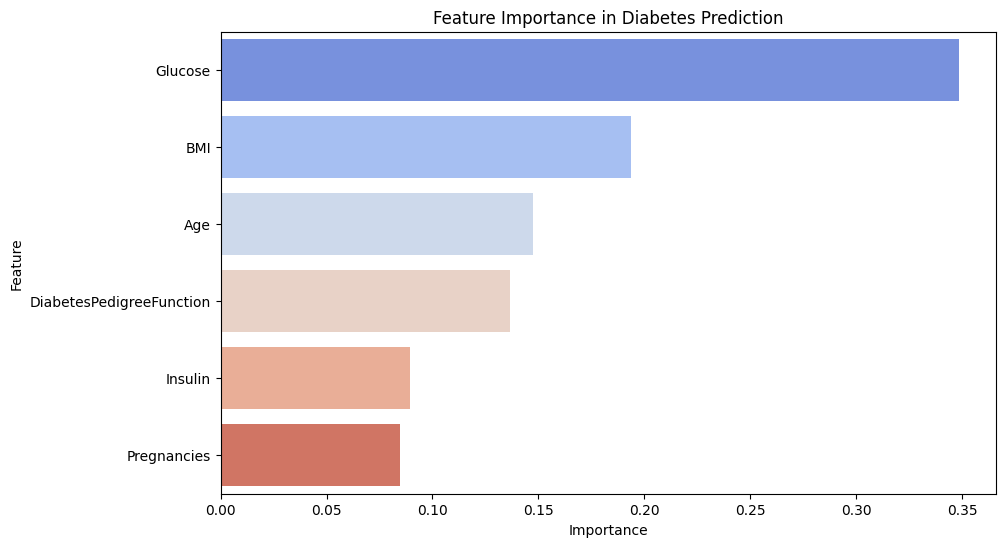

                    Feature  Importance
1                   Glucose    0.348241
3                       BMI    0.193630
5                       Age    0.147455
4  DiabetesPedigreeFunction    0.136382
2                   Insulin    0.089451
0               Pregnancies    0.084842


In [46]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Convert to DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_importance_df, palette='coolwarm')
plt.title('Feature Importance in Diabetes Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Print feature importance
print(feature_importance_df)

In [47]:
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC

Accuracy: 0.7662


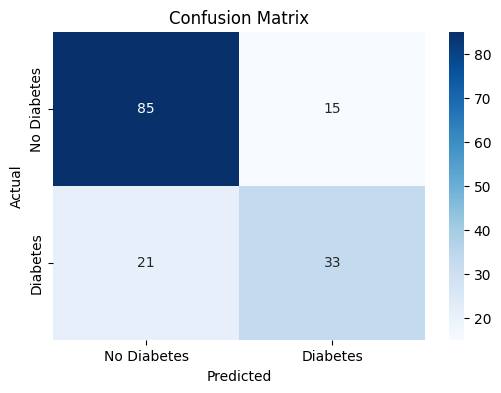

AUC-ROC Score: 0.8209


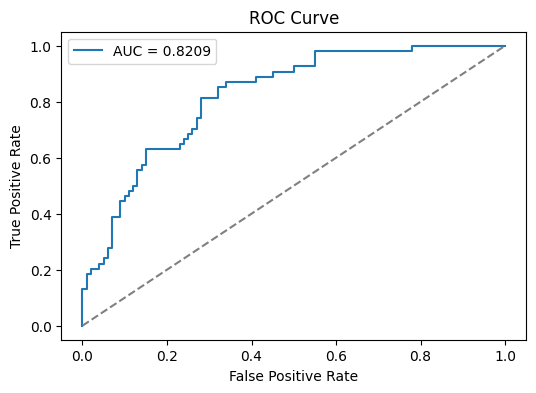

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       100
           1       0.69      0.61      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



In [48]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC Score: {roc_auc:.4f}")
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))